In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [10]:
!pip install Pillow

from PIL import Image


In [11]:
import pathlib
dataset_url = "/content/drive/MyDrive/Final_Year_Weather_Classification/DayNightSense"
data_dir = pathlib.Path('/content/drive/MyDrive/Final_Year_Weather_Classification/DayNightSense', origin="/content/drive/MyDrive/Final_Year_Weather_Classification/DayNightSense", untar=True)
data_dir = pathlib.Path(data_dir)

In [12]:
print(data_dir)

/content/drive/MyDrive/Final_Year_Weather_Classification/DayNightSense


/content/drive/MyDrive/Final_Year_Weather_Classification/DayNightSense/Night/Night_original_WhatsApp Image 2024-03-10 at 11.17.47 PM.jpg_6e371674-7d4a-4df0-b0ef-5d146e1a2f69.jpg


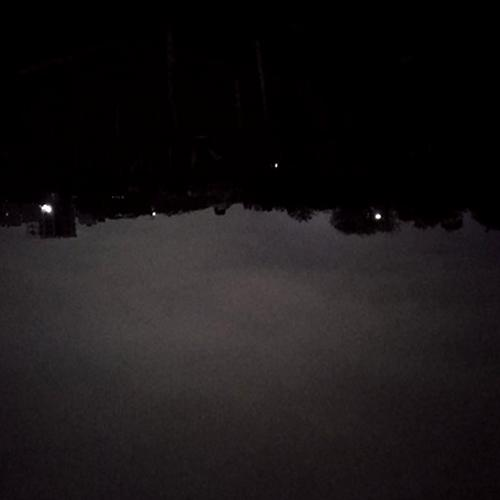

In [16]:

import PIL
DayNightSense = list(data_dir.glob('Night/*'))
print(DayNightSense[0])
PIL.Image.open(str(DayNightSense[0]))

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import tensorflow as tf
img_height,img_width=500,500
batch_size=64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2072 files belonging to 2 classes.
Using 1658 files for training.


In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2072 files belonging to 2 classes.
Using 414 files for validation.


In [19]:
class_names = train_ds.class_names
print(class_names)

['Day', 'Night']


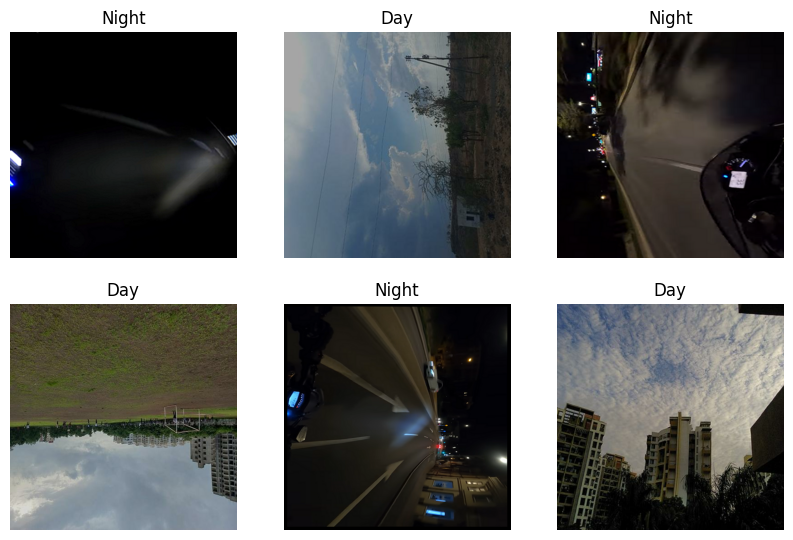

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [21]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(500,500,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [22]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [23]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
resnet_model.summary()
for data, labels in train_ds.take(1):
    print("Input shape:", data.shape)
    print("Label shape:", labels.shape)  # Ensure it matches the model's output shape

resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 2
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

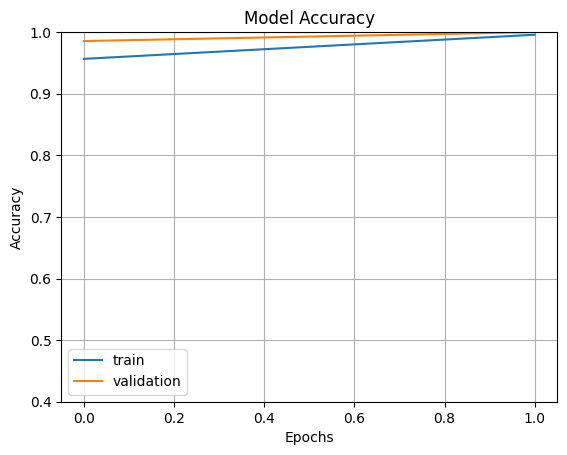

In [25]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

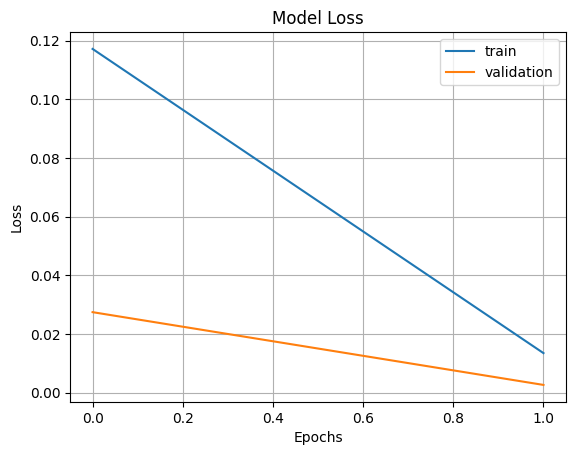

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [29]:
import cv2
image=cv2.imread(str(DayNightSense[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 500, 500, 3)


In [30]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 2s 2s/step
[[2.2211162e-07 9.9999976e-01 3.2700851e-19 1.4369962e-25 5.1150968e-26]]


In [31]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Night
